# IMPORTS

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import validation_curve
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import pickle
import warnings
import numpy as np
import math
import gradio as gr
from joblib import dump
from joblib import load
from datetime import datetime

# DATA READING

In [3]:
# Change Dir
os.chdir(r'C:\Users\vslso\OneDrive\Desktop\Internship')

In [4]:
# Read and display csv
df=pd.read_csv('rossman.csv', low_memory = False,index_col=0)
df

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,
1,5,31/07/2015,5263,555,1,1,0,1
2,5,31/07/2015,6064,625,1,1,0,1
3,5,31/07/2015,8314,821,1,1,0,1
4,5,31/07/2015,13995,1498,1,1,0,1
5,5,31/07/2015,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...
1111,2,1/01/2013,0,0,0,0,a,1
1112,2,1/01/2013,0,0,0,0,a,1
1113,2,1/01/2013,0,0,0,0,a,1


In [5]:
df2=pd.read_csv('store.csv',index_col=0)
df2

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [6]:
# Join function to join the two data frames
#df.set_index('Store', inplace=True)
#df2.set_index('Store', inplace=True)
#merged_df=df.join(df2, how='left')
#merged_df

merged_df = pd.merge(df, df2, on='Store', how='left')

In [7]:
# Create merged csv
#merged_df.to_csv('merged.csv')
del(df,df2,merged_df)
df=pd.read_csv('merged.csv',low_memory = False,index_col = None)
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31/07/2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,31/07/2015,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,31/07/2015,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,31/07/2015,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,31/07/2015,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,1/01/2013,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,1/01/2013,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,1/01/2013,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,1/01/2013,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


# DATA DESCRIPTION

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [9]:
with pd.option_context('display.float_format', '{:.2f}'.format):
    print(df[['Sales', 'Customers', 'CompetitionDistance']].describe())

           Sales  Customers  CompetitionDistance
count 1017209.00 1017209.00           1014567.00
mean     5773.82     633.15              5430.09
std      3849.93     464.41              7715.32
min         0.00       0.00                20.00
25%      3727.00     405.00               710.00
50%      5744.00     609.00              2330.00
75%      7856.00     837.00              6890.00
max     41551.00    7388.00             75860.00


In [10]:
df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [11]:
df.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     4
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
PromoInterval                    3
dtype: int64

# DATA PREPERATION

In [12]:
# Converting columns to int
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].astype('Int64')
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].astype('Int64')
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].astype('Int64')
df['Promo2SinceYear'] = df['Promo2SinceYear'].astype('Int64')

In [13]:
# If the store is closed there will be no sale
sales_when_closed = df.loc[df['Open'] == 0, 'Sales'].sum()
print("Total sales when store is closed (Open = 0):", sales_when_closed)
print("The number of rows where the store is open is:",df['Open'].value_counts()[1])
df=df[df['Open']==1].copy()
df

Total sales when store is closed (Open = 0): 0
The number of rows where the store is open is: 844392


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31/07/2015,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,<NA>,<NA>,NaN
1,2,5,31/07/2015,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,31/07/2015,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,31/07/2015,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,<NA>,<NA>,NaN
4,5,5,31/07/2015,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,<NA>,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,1/01/2013,3375,566,1,0,a,1,b,a,150.0,9,2006,0,<NA>,<NA>,NaN
1016827,733,2,1/01/2013,10765,2377,1,0,a,1,b,b,860.0,10,1999,0,<NA>,<NA>,NaN
1016863,769,2,1/01/2013,5035,1248,1,0,a,1,b,b,840.0,<NA>,<NA>,1,48,2012,"Jan,Apr,Jul,Oct"
1017042,948,2,1/01/2013,4491,1039,1,0,a,1,b,b,1430.0,<NA>,<NA>,0,<NA>,<NA>,NaN


In [14]:
# Convert date into a datetime object
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
print(df['Date'].dtype)

datetime64[ns]


In [15]:
#Add seperate columns for date, time and year
df['Day'] = df.Date.dt.day
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

In [16]:
print(df['CompetitionDistance'].median())
print(df['CompetitionDistance'].mean())

2320.0
5457.979627312083


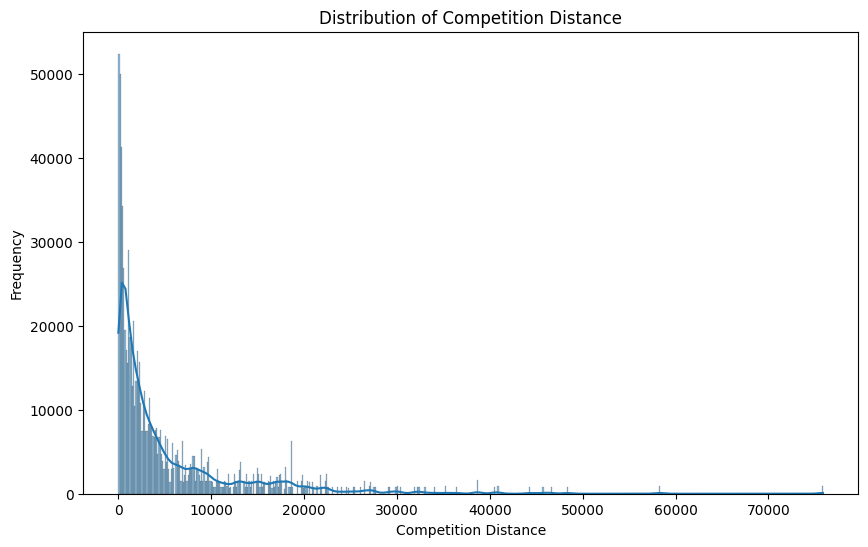

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CompetitionDistance'], kde=True)
plt.title('Distribution of Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Calculate the median
median_distance = df['CompetitionDistance'].median()

# Fill null values with the median
df['CompetitionDistance'] = df['CompetitionDistance'].fillna(median_distance)

# FEATURE SELECTION AND SPLITTING

In [19]:
# Features to exclude
features_to_exclude = ['Date', 'Sales', 'Open', 'CompetitionOpenSinceMonth', 
                       'CompetitionOpenSinceYear', 'Promo2SinceWeek', 
                       'Promo2SinceYear', 'PromoInterval']

# Split data into features and target variable
X = df.drop(columns=features_to_exclude)
y = df['Sales']

# Split data into training and testing sets (80% training, 20% testing)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split training set into training and validation sets (75% training, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# Print the sizes of the resulting datasets
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 506634
Validation set size: 168879
Testing set size: 168879


# DATA ANALYSIS (PLOTS)

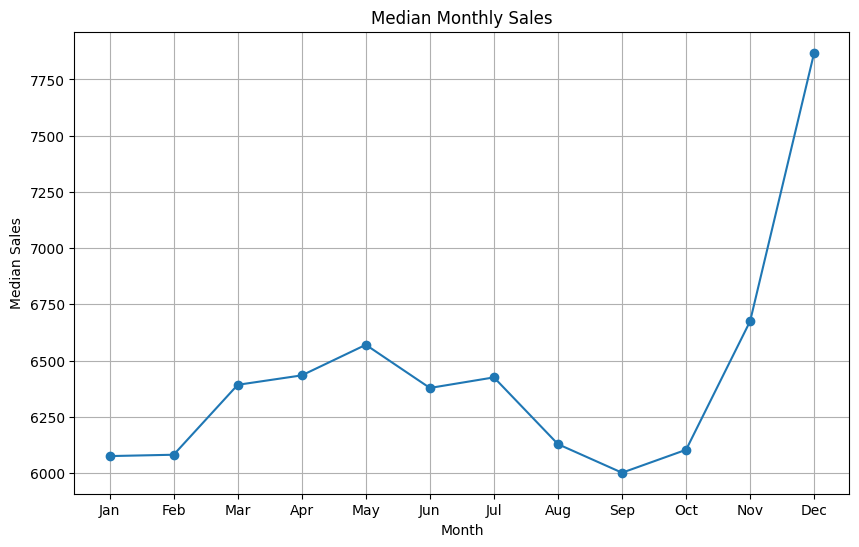

In [20]:
# Monthly Sales over time
# Suppress warnings
warnings.filterwarnings("ignore")
# Concatenate X_train and y_train
temp_df = pd.concat([X_train, y_train], axis=1)
monthly_sales = temp_df.groupby(['Month'])['Sales'].median()

# Plotting the time series data
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o')
plt.title('Median Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Median Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

### Median Monthly sales can be seen to increase by alot during the months of November and December

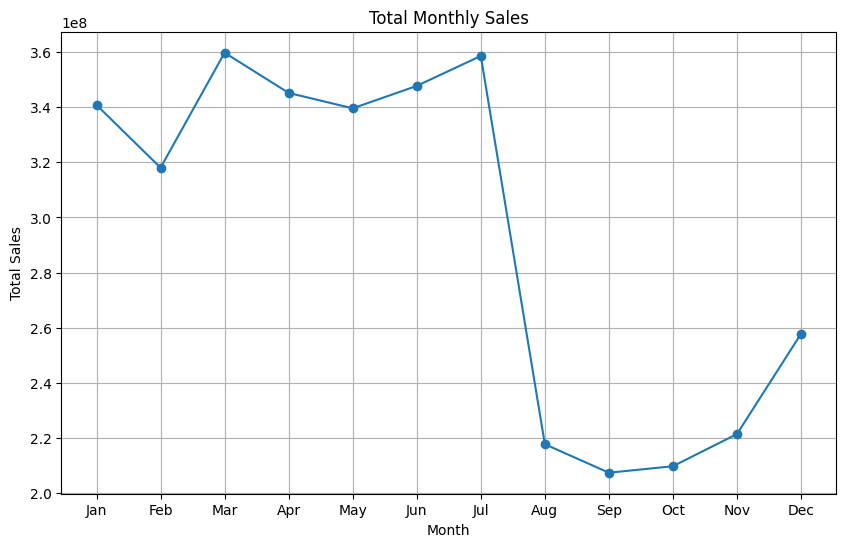

In [21]:
monthly_sales_total = temp_df.groupby(['Month'])['Sales'].sum()

# Plotting the time series data
plt.figure(figsize=(10, 6))
monthly_sales_total.plot(marker='o')  # Adding markers for better visualization
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

### Though average sales was seen to increase during Nov and Dec the total sales can be seen to decrease after july and only slightly increase in Nov and Dec

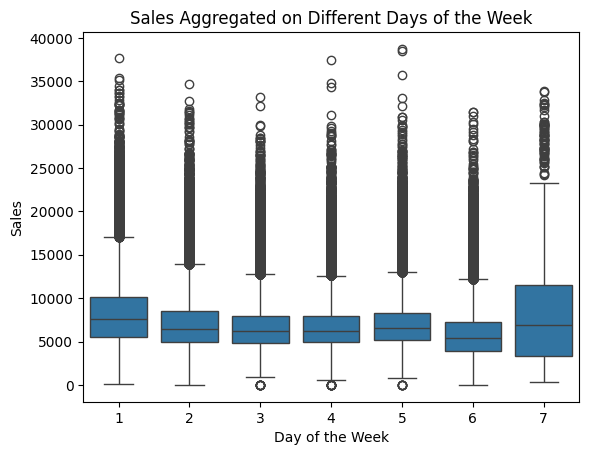

In [22]:
# Boxplot for sales of different days of the week
sns.boxplot(x='DayOfWeek', y='Sales', data=temp_df)
plt.title('Sales Aggregated on Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.show()

### Sales on Monday and Sunday are seen to be higher based on a median and slightly lower than the rest of the week on Saturday.

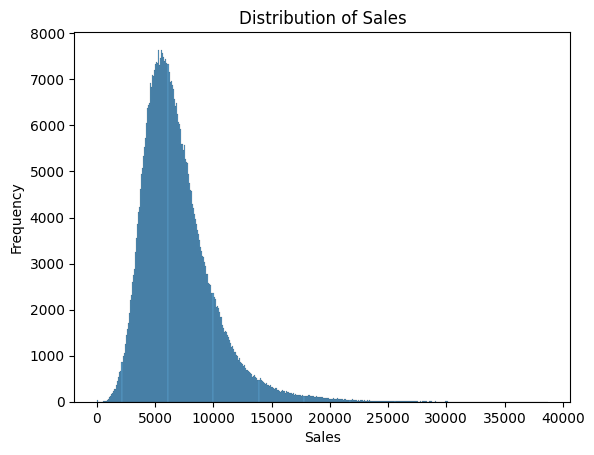

In [23]:
# Sales distribution
sns.histplot(temp_df['Sales'], kde=False)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

### The distribution of sales is slightly right skewed

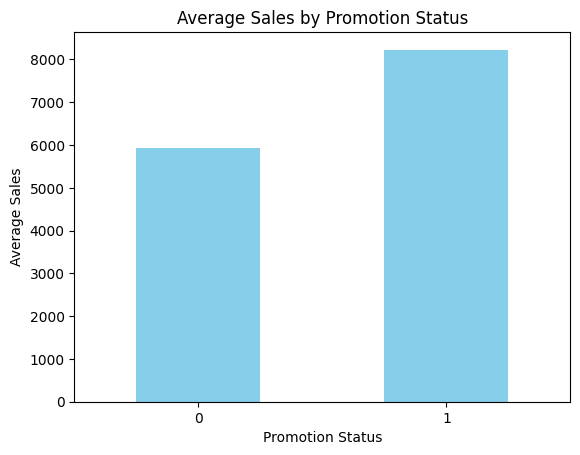

In [24]:
# Group by 'Promo' column and calculate average sales
average_sales_by_promotion = temp_df.groupby('Promo')['Sales'].mean()
# Plot bar graph for average sales by promotion status
average_sales_by_promotion.plot(kind='bar', color='skyblue')
plt.title('Average Sales by Promotion Status')
plt.xlabel('Promotion Status')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.show()

### Average sales is higher during Promotion periods

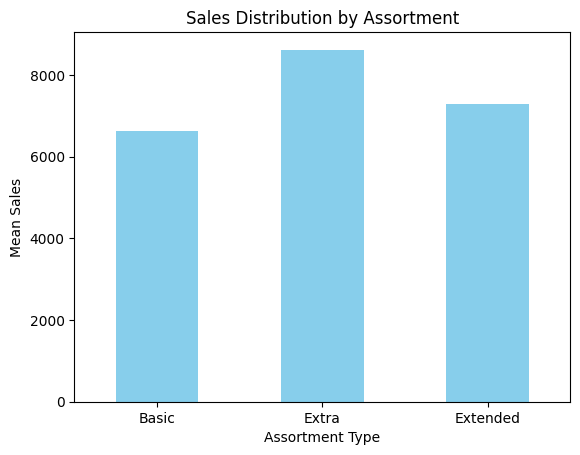

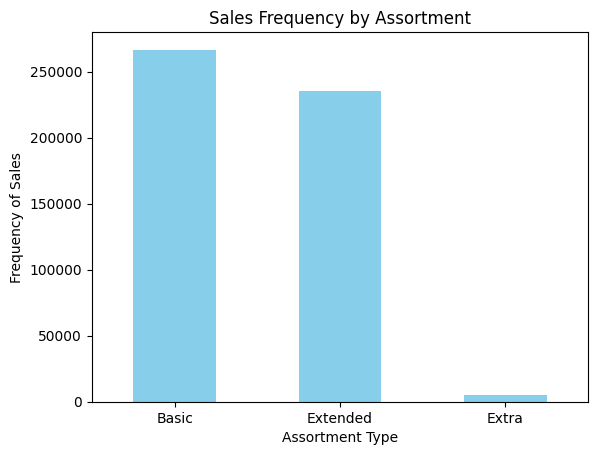

In [25]:
# Mean sales by assortment
mean_sales_by_assortment = temp_df.groupby('Assortment')['Sales'].mean()
mean_sales_by_assortment.plot(kind='bar', color='skyblue')
plt.title('Sales Distribution by Assortment')
plt.xlabel('Assortment Type')
plt.ylabel('Mean Sales')
plt.xticks(rotation=0)
plt.xticks(range(len(mean_sales_by_assortment.index)), ['Basic', 'Extra', 'Extended'])
plt.show()

# Sales frequency by assortment
sales_frequency_by_assortment = temp_df['Assortment'].value_counts()
sales_frequency_by_assortment.plot(kind='bar', color='skyblue')
plt.title('Sales Frequency by Assortment')
plt.xlabel('Assortment Type')
plt.ylabel('Frequency of Sales')
plt.xticks(rotation=0)
plt.xticks(range(len(sales_frequency_by_assortment.index)), ['Basic', 'Extended', 'Extra'])
plt.show()

### Even though Extra assortment level has the highest average sales the frequency of sales is the lowest.

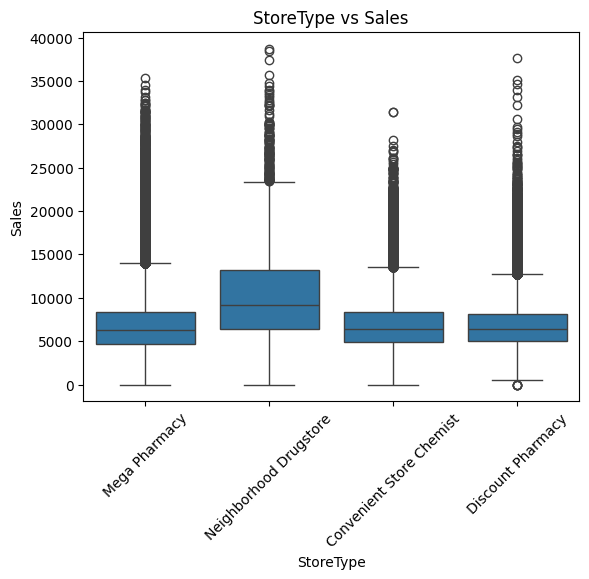

In [26]:
# Store Type vs Sales Box Plot
storetype_order = sorted(temp_df['StoreType'].unique())
storetype_labels = {
    'a': 'Mega Pharmacy',
    'b': 'Neighborhood Drugstore',
    'c': 'Convenient Store Chemist',
    'd': 'Discount Pharmacy'
}
sns.boxplot(x='StoreType', y='Sales', data=temp_df, order=storetype_order)
plt.title('StoreType vs Sales')
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.xticks(range(len(storetype_order)), [storetype_labels[storetype] for storetype in storetype_order])
plt.xticks(rotation=45)
plt.show()

### Neighborhood Drugstores have the highest median sales

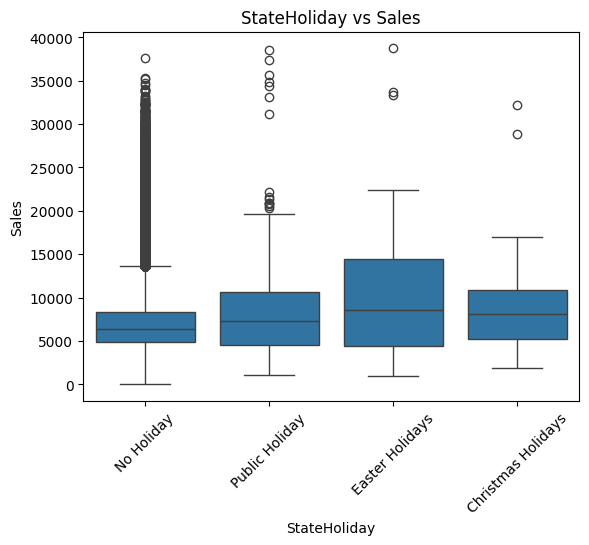

In [27]:
# StateHoliday vs Sales
stateholiday_order = sorted(temp_df['StateHoliday'].unique())
stateholiday_labels = {
    '0': 'No Holiday',
    'a': 'Public Holiday',
    'b': 'Easter Holidays',
    'c': 'Christmas Holidays'
}
sns.boxplot(x='StateHoliday', y='Sales', data=temp_df, order=stateholiday_order)
plt.title('StateHoliday vs Sales')
plt.xlabel('StateHoliday')
plt.ylabel('Sales')
plt.xticks(range(len(stateholiday_order)), [stateholiday_labels[StateHoliday] for StateHoliday in stateholiday_order])
plt.xticks(rotation = 45)
plt.show()

### Easter Holidays has the highest median sales

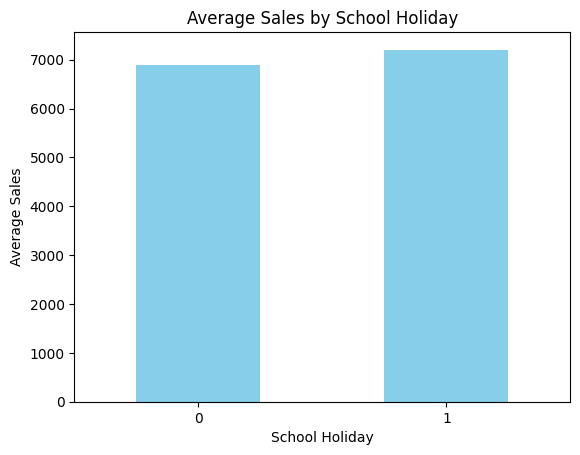

In [28]:
# School holiday vs sales
average_sales_by_schoolholiday = temp_df.groupby('SchoolHoliday')['Sales'].mean()
# Plot bar graph for average sales by School Holiday
average_sales_by_schoolholiday.plot(kind='bar', color='skyblue')
plt.title('Average Sales by School Holiday')
plt.xlabel('School Holiday')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.show()

### The average sales when there is a school holiday is minimally higher than the average sales when there isn't a school holiday.

In [29]:
del(temp_df)

# MACHINE LEARNING MODELS

### LINEAR REGRESSION

In [30]:
# One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_val_encoded = pd.get_dummies(X_val)
X_test_encoded = pd.get_dummies(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_encoded, y_train)

LinearRegression()

Root Mean Squared Error (RMSE): 1305.4327178344038
R^2 Score: 0.8247178382166322
Mean Absolute Error (MAE): 946.7076416619939


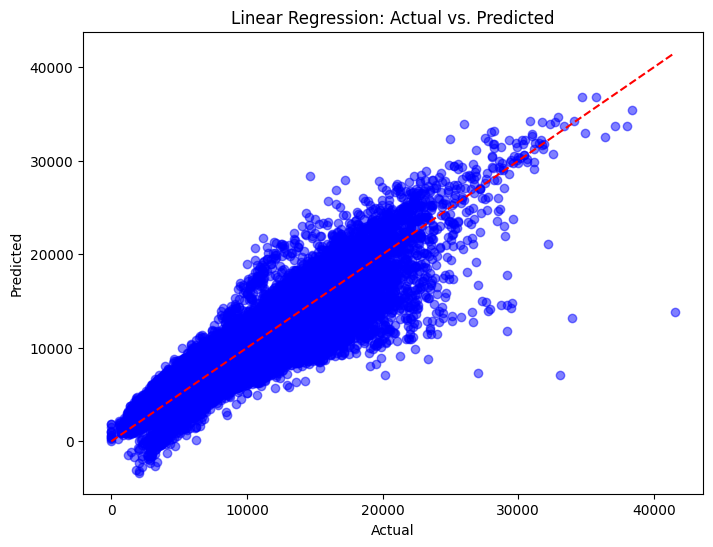

In [31]:
# Make predictions on the test data
y_pred_lr = model.predict(X_val_encoded)

# Evaluate the model
mse_lr = mean_squared_error(y_val, y_pred_lr)
mae_lr = mean_absolute_error(y_val, y_pred_lr)
r2_lr = r2_score(y_val, y_pred_lr)

rmse_lr = np.sqrt(mse_lr)
print("Root Mean Squared Error (RMSE):", rmse_lr)
print("R^2 Score:", r2_lr)
print("Mean Absolute Error (MAE):",mae_lr)

# Linear Regression
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_lr, color='blue', alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()

### DECISION TREE

In [32]:
# Create an instance of DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree Regressor
tree_regressor.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred_dt = tree_regressor.predict(X_val_encoded)

# Evaluate the model
mse_dt = mean_squared_error(y_val, y_pred_dt)
r2_dt = r2_score(y_val, y_pred_dt)
mae_dt = mean_absolute_error(y_val, y_pred_dt)

rmse_dt = np.sqrt(mse_dt)
print("Root Mean Squared Error (RMSE):", rmse_dt)
print("Mean Absolute Error (MAE):", mae_dt)
print("R-squared (R^2) Score:", r2_dt)

Root Mean Squared Error (RMSE): 742.594042937369
Mean Absolute Error (MAE): 479.39419939720153
R-squared (R^2) Score: 0.9432805962806248


### RANDOM FOREST

In [33]:
# Create an instance of RandomForestRegressor
forest_regressor = RandomForestRegressor(random_state=42)

# Train the Random Forest Regressor
forest_regressor.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = forest_regressor.predict(X_val_encoded)

# Evaluate the model
mse_rf = mean_squared_error(y_val, y_pred)
r2_rf = r2_score(y_val, y_pred)
mae_rf = mean_absolute_error(y_val, y_pred)
rmse_rf = np.sqrt(mse_rf)

print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R^2) Score:",r2_rf)
print("Mean Absolute Error (MAE):", mae_rf)

Root Mean Squared Error (RMSE): 519.60415672161
R-squared (R^2) Score: 0.9722301222502224
Mean Absolute Error (MAE): 339.4462492672268


In [77]:
#with open('randomforestmodel.pkl', 'wb') as file:
    #pickle.dump(forest_regressor, file)

In [78]:
with open('randomforestmodel.pkl', 'rb') as file:
    forest_regressor = pickle.load(file)
y_pred = forest_regressor.predict(X_val_encoded)

# Evaluate the model
mse_rf = mean_squared_error(y_val, y_pred)
r2_rf = r2_score(y_val, y_pred)
mae_rf = mean_absolute_error(y_val, y_pred)

rmse_rf = np.sqrt(mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R-squared (R^2) Score:", r2_rf)

Root Mean Squared Error (RMSE): 519.60415672161
Mean Absolute Error (MAE): 339.4462492672268
R-squared (R^2) Score: 0.9722301222502224


### KNN Regressor

In [80]:
# Initialize KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_regressor.fit(X_train_encoded, y_train)

# Make predictions
y_pred_knn = knn_regressor.predict(X_val_encoded)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred_knn)
r2 = r2_score(y_val, y_pred_knn)
mae = mean_absolute_error(y_val, y_pred_knn)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", r2)

Root Mean Squared Error (RMSE): 698.1897343260922
Mean Absolute Error (MAE): 467.309177576845
R-squared (R^2) Score: 0.9498610017809664


In [82]:
#with open('knnmodel.pkl', 'wb') as file1:
    #pickle.dump(knn_regressor, file1)

In [83]:
with open('knnmodel.pkl', 'rb') as file1:
    knn_regressor = pickle.load(file1)
y_pred_knn = knn_regressor.predict(X_val_encoded)

# Evaluate the model
mse_knn = mean_squared_error(y_val, y_pred_knn)
r2_knn = r2_score(y_val, y_pred_knn)
mae_knn = mean_absolute_error(y_val, y_pred_knn)

rmse_knn = np.sqrt(mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", r2_knn)

Root Mean Squared Error (RMSE): 698.1897343260922
Mean Absolute Error (MAE): 467.309177576845
R-squared (R^2) Score: 0.9498610017809664


### XGBOOST REGRESSOR

In [85]:
# Initialize XGBoost regressor
xgb_regressor = xgb.XGBRegressor()

# Train the model
xgb_regressor.fit(X_train_encoded, y_train)

# Make predictions
y_pred_xgb = xgb_regressor.predict(X_val_encoded)

# Evaluate the model
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_val, y_pred_xgb)
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)

print("Root Mean Squared Error (RMSE):", rmse_xgb)
print("Mean Absolute Error (MAE):", mae_xgb)
print("R-squared (R^2) Score:", r2_xgb)

Root Mean Squared Error (RMSE): 593.6641212953342
Mean Absolute Error (MAE): 414.04778370828353
R-squared (R^2) Score: 0.9637498056023521


### PCA

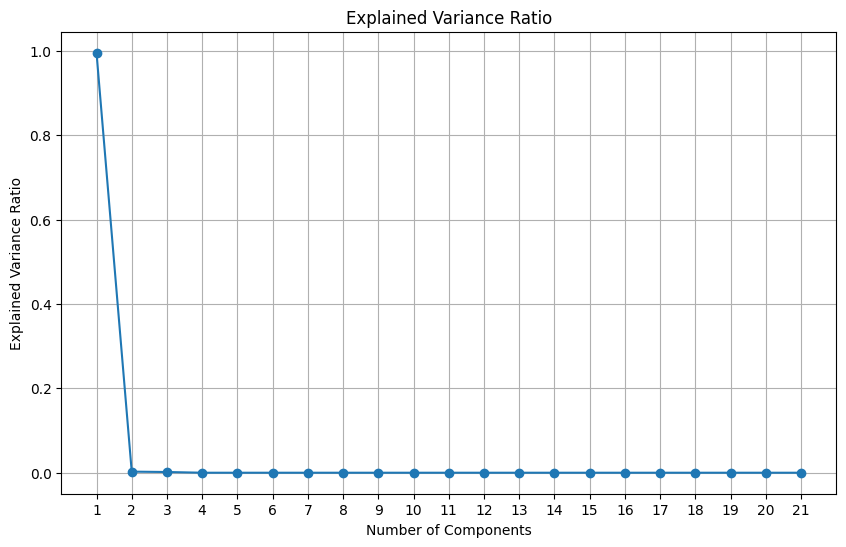

In [196]:
# Fit PCA to data
pca = PCA().fit(X_train_encoded)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))  
plt.grid(True)
plt.show()

In [87]:
# Initialize PCA
pca = PCA(n_components=2)

# Fit PCA to training data
pca.fit(X_train_encoded)

# Fit PCA to data and transform it
X_train_pca = pca.fit_transform(X_train_encoded)
X_test_pca = pca.transform(X_val_encoded)

In [90]:
# Create an instance of RandomForestRegressor
forest_regressor = RandomForestRegressor(random_state=42)

# Train the Random Forest Regressor
forest_regressor.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_pca = forest_regressor.predict(X_test_pca)

# Evaluate the model
mse_rf_pca = mean_squared_error(y_val, y_pred_pca)
r2_rf_pca = r2_score(y_val, y_pred_pca)
mae_rf_pca = mean_absolute_error(y_val, y_pred_pca)

rmse_rf_pca = np.sqrt(mse_rf_pca)
print("Root Mean Squared Error (RMSE):", rmse_rf_pca)
print("Mean Absolute Error (MAE):", mae_rf_pca)
print("R-squared (R^2) Score:",r2_rf_pca)

Root Mean Squared Error (RMSE): 839.7569759321439
Mean Absolute Error (MAE): 559.822409950907
R-squared (R^2) Score: 0.9274669441242459


In [92]:
# Initialize XGBoost regressor
xgb_regressor = xgb.XGBRegressor()

# Train the model
xgb_regressor.fit(X_train_pca, y_train)

# Make predictions
y_pred_xgb_pca = xgb_regressor.predict(X_test_pca)

# Evaluate the model
mse_xgb_pca = mean_squared_error(y_val, y_pred_xgb_pca)
rmse_xgb_pca = mse_xgb_pca ** 0.5
r2_xgb_pca = r2_score(y_val, y_pred_xgb_pca)
mae_xgb_pca = mean_absolute_error(y_val, y_pred_xgb_pca)

print("Root Mean Squared Error (RMSE):", rmse_xgb_pca)
print("Mean Absolute Error (MAE):", mae_xgb_pca)
print("R-squared (R^2) Score:", r2_xgb_pca)

Root Mean Squared Error (RMSE): 1216.9754620368817
Mean Absolute Error (MAE): 887.5823237437803
R-squared (R^2) Score: 0.8476675672809192


In [100]:
models_data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'KNN', 'XGBoost', 'Random Forest PCA', 'XGBoost PCA'],
    'Root Mean Squared Error (RMSE)': [rmse_lr, rmse_dt, rmse_rf, rmse_knn, rmse_xgb, rmse_rf_pca, rmse_xgb_pca],
    'R-squared (R^2) Score': [r2_lr, r2_dt, r2_rf, r2_knn, r2_xgb, r2_rf_pca, r2_xgb_pca],
    'Mean Absolute Error (MAE)':[mae_lr, mae_dt, mae_rf, mae, mae_xgb, mae_rf_pca, mae_xgb_pca]
}

# Create a DataFrame from the data
models_df = pd.DataFrame(models_data)

# Display the DataFrame
models_df

,Model,Root Mean Squared Error (RMSE),R-squared (R^2) Score,Mean Absolute Error (MAE)
0,Linear Regression,1305.432718,0.824718,946.707642
1,Decision Tree,742.594043,0.943281,479.394199
2,Random Forest,519.604157,0.972230,339.446249
3,KNN,698.189734,0.949861,467.309178
4,XGBoost,593.664121,0.963750,414.047784
5,Random Forest PCA,839.756976,0.927467,559.822410
6,XGBoost PCA,1216.975462,0.847668,887.582324


# HYPERPARAMETER TUNING

In [ ]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up Random Search
random_search = RandomizedSearchCV(estimator=forest_regressor, param_distributions=param_grid, n_iter=100, cv=3, random_state=42, n_jobs=-1)

# Perform Random Search
random_search.fit(X_train_encoded, y_train)

# Get Best Parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

### Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}

In [34]:
# Instantiate RandomForestRegressor with best hyperparameters
best_forest_regressor = RandomForestRegressor(n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=30, random_state=42)
best_forest_regressor.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred_hyper1 = best_forest_regressor.predict(X_test_encoded)

# Evaluate the model
mse_h1 = mean_squared_error(y_test, y_pred_hyper1)
r2_h1 = r2_score(y_test, y_pred_hyper1)
mae_h1 = mean_absolute_error(y_test, y_pred_hyper1)
rmse_h1 = np.sqrt(mse_h1)

print("Root Mean Squared Error (RMSE):", rmse_h1)
print("R-squared (R^2) Score:", r2_h1)
print("Mean Absolute Error (MAE):", mae_h1)

Root Mean Squared Error (RMSE): 511.57372075590916
R-squared (R^2) Score: 0.9728624935591194
Mean Absolute Error (MAE): 337.33464095289224


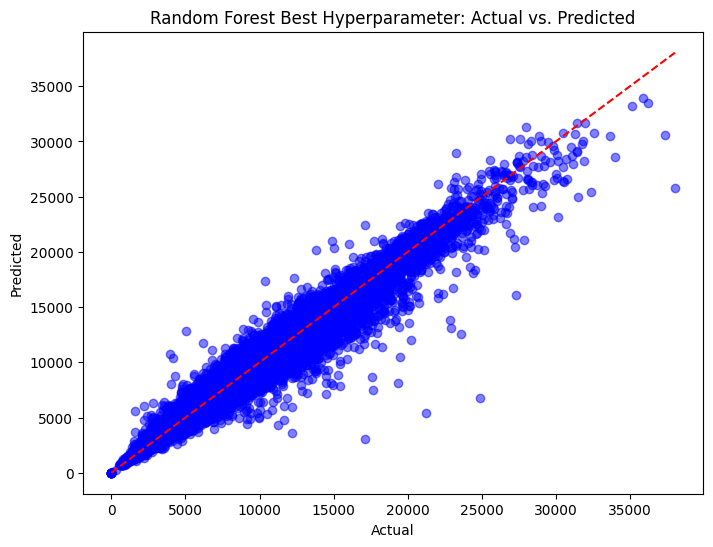

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_hyper1, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Best Hyperparameter: Actual vs. Predicted')
plt.show()

In [16]:
#Save
#dump(best_forest_regressor, 'best_forest_regressor.joblib')
#Load
# Load the model from the model
best_forest_regressor = load('best_forest_regressor.joblib')

In [35]:
models_data1 = {
    'Model': ['Random Forest', 'Random Forest Best Parameters'],
    'Root Mean Squared Error (RMSE)': [rmse_rf, rmse_h1],
    'R-squared (R^2) Score': [r2_rf, r2_h1],
    'Mean Absolute Error (MAE)':[mae_rf, mae_h1]
}
models_df1 = pd.DataFrame(models_data1)
models_df1

,Model,Root Mean Squared Error (RMSE),R-squared (R^2) Score,Mean Absolute Error (MAE)
0,Random Forest,519.604157,0.972230,339.446249
1,Random Forest Best Parameters,511.573721,0.972862,337.334641


# MODEL DEPLOY

In [36]:
def map_day_to_numeric(day):
    days_map = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
    return days_map.get(day)

def state_holiday_input(stat):
    holiday_map = {'No Holiday': '0', 'Public Holiday': 'a', 'Easter Holiday': 'b', 'Christmas Holiday': 'c'}
    return holiday_map.get(stat)

def store_type_input(ip):
    type_map = {'Mega Pharmacy': 'a', 'Neighborhood Drugstore': 'b', 'Convenient Store Chemist': 'c', 'Discount Pharmacy': 'd'}
    return type_map.get(ip)

def assortment_input(inp):
    assortment_map = {'Basic': 'a', 'Extra': 'b', 'Extended': 'c'}
    return assortment_map.get(inp)

In [37]:
def predict_sales(date, store, customers, state_holiday, school_holiday):
    try:
        # Extract additional information from the dataframe based on store ID
        store_info = df[df['Store'] == store].iloc[0]
        promo = store_info['Promo']
        promo2 = store_info['Promo2']
        store_type = store_info['StoreType']
        assortment = store_info['Assortment']
        competition_distance = store_info['CompetitionDistance']
        
        # Calculate the day of the week from the provided date
        day_of_week = datetime.strptime(date, '%Y-%m-%d').strftime('%A')
        day_of_week_numeric = map_day_to_numeric(day_of_week)
        
        # Perform predictions
        input_data = pd.DataFrame({
            'Date': [date],
            'Store': [store],
            'Customers': [customers],
            'Promo': [promo],
            'Promo2': [promo2],
            'StoreType': [store_type],
            'Assortment': [assortment],
            'CompetitionDistance': [competition_distance],
            'DayOfWeek': [day_of_week_numeric],
            'StateHoliday': [state_holiday],
            'SchoolHoliday': [school_holiday]
        })

        # Assuming best_forest_regressor is your trained model
        input_encoded = pd.get_dummies(input_data)
        for col in X_train_encoded.columns:
            if col not in input_encoded.columns:
                input_encoded[col] = 0
        input_encoded = input_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
        
        prediction = best_forest_regressor.predict(input_encoded)
        prediction_value = float(prediction[0])
        prediction_with_sign = '${:.2f}'.format(prediction_value)

        return prediction_with_sign
    except Exception as e:
        return str(e)

# Define Gradio interface
iface = gr.Interface(
    fn=predict_sales,
    inputs=[
        gr.Textbox(label="Date (YYYY-MM-DD)"),
        gr.Number(label="Store ID (1-1115)", step=1),
        gr.Number(label="Customers", step=1),
        gr.Dropdown(label="State Holiday", choices=[
            ('No Holiday'), ('Public Holiday'), ('Easter Holiday'), ('Christmas Holiday')
        ]),
        gr.Checkbox(label="School Holiday"),
    ],
    outputs=gr.Textbox(label="Predicted Sales"),
    title="Sales Predictor",
    description="Predict sales based on detailed store features."
)

IMPORTANT: You are using gradio version 4.28.3, however version 4.44.1 is available, please upgrade.
--------


# Rossman's Retail Sales Prediction
* Rossman owns 3000 drugstores in 7 european countries.
* Rossman tasks managers of individual stores to predict sales data for atleast upto 6 weeks.
* As an independent analyst the task is long term sales prediction based on historical data for multiple stores.
* Stores 1-1115 have been assigned for sales data prediction based on historical data.

In [38]:
# Launch the interface
iface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
